In [1]:
# 设置工作区
import os
# 设置工作目录为项目根目录
os.chdir('../..')

#### 导入makemoon查看数据分布

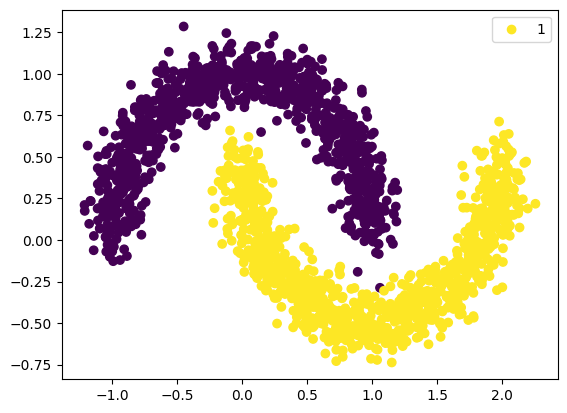

In [2]:
%matplotlib inline
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from src.node import Node, Graph

# 生成 make_moons 数据集
X, y = make_moons(n_samples=2000, noise=0.1, random_state=42)

nodes = []
index = 0
for df, label in zip(X, y):
    nodes.append(Node(df, label, index))
    index += 1
# scatter
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.legend(y, loc='upper right')
plt.savefig('images/DeepWalk/make_moon.png')
plt.show()

#### 生成图

In [3]:
# 获取图
graph = Graph(nodes)
adjacency_matrix = graph.get_adjacency_matrix()

#根据邻接矩阵获取所有的二元组，如：[(0, 1), (0, 2), (1, 2)]
edges = graph.get_edges()

#### 使用deepwalk跑邻接矩阵

In [4]:
from src.deepwalk import deepwalk
nx = graph.to_nx()
# print(nx.nodes)
embeddings = deepwalk(nx)
# embeddings

[[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7], [982, 1054, 89, 1624, 265, 1297, 1618, 1740, 556, 859, 1470, 1055, 1225, 817, 481, 1028, 1448, 9, 1282, 89, 55, 757, 366, 807, 810, 515, 458, 144, 1211, 1057, 1477, 1323, 1961, 1492, 1500, 882, 931, 474, 370, 1704, 1035, 790, 1262, 1799, 122, 1194, 1777, 596, 481, 1440, 1167, 716, 232, 366, 36, 1778, 817, 522, 1648, 520], [284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284], [1552, 1552, 1552, 1552, 1552, 1552, 1552, 1552, 1552, 1552, 1552, 1552, 1552, 1552, 1552, 1552, 1552, 1552, 1552, 1552, 1552, 1552, 1552, 1552, 1552, 1552, 1552, 1552, 1552, 1552, 1552, 1552

#### 取出embedding前两维，做可视化

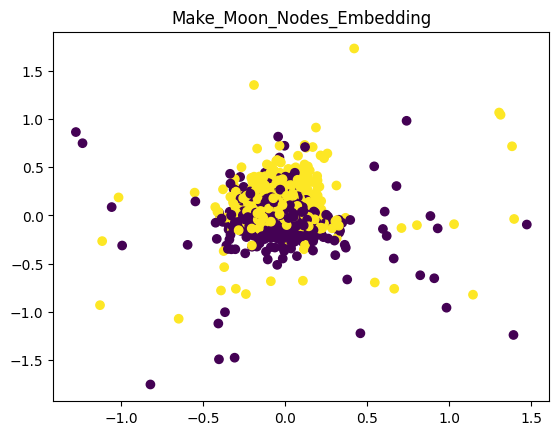

In [5]:
# 随便取两个维度看看
x = [embedding[0] for embedding in list(embeddings.values()) if embedding is not None]
y = [embedding[1] for embedding in list(embeddings.values()) if embedding is not None]



label = [node.label for node in nodes if(embeddings[str(node.index)] is not None)]

# 创建散点图
plt.scatter(x, y, c=label)
plt.title("Make_Moon_Nodes_Embedding")
plt.savefig('images/DeepWalk/make_moon_embedding.png')
# 显示图形
plt.show()

#### PCA降维，降到2维

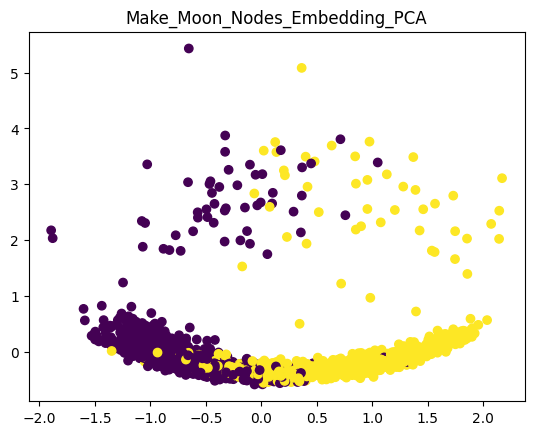

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 先drop掉None
embeddings = {key: value for key, value in embeddings.items() if value is not None}
# 假设embeddings是一个字典，其中包含嵌入值
embeddings_value = list(embeddings.values())

# 使用PCA进行降维
pca = PCA(n_components=2)
pca.fit(embeddings_value)
X_pca = pca.transform(embeddings_value)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=label)
plt.title("Make_Moon_Nodes_Embedding_PCA")
plt.savefig('images/DeepWalk/make_moon_embedding_pca.png')
plt.show()
